# Introduction

In this Notebook we are going to talk about the fascinating characteristics that surround Support Vector Machines (SVM's). SVM's are supervised learning methods that allow you to classify data by creating a boundary that separate the different outputs.

To begin, as always, we will import the necessary libraries.

- matplotlib.pyplot : This is used to generate plots
- pandas : This is used to generate dataframes in Python
- sklearn : This is the library that holds the actual model itself. We are only working with SVM's so we just need the svm library as well as the datasets library to have some data to work with
- Numpy : Used to help create and manipulate arrays

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import datasets, svm
import numpy as np

## Loading The Data

Here we will once again be working with the iris dataset that is included with sklearn.

In [2]:
iris = datasets.load_iris()

## Taking a Look

It is important to know how the data we are using is organized and what is contained within the dataset. In the next few lines of code we will simply be looking at some of the features included within the iris dataset.

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
print(iris.target, iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] ['setosa' 'versicolor' 'virginica']


## Splitting The Data

There are many tutorials that split the data but very few explain why. The reason for why I am splitting the data into two columns is simply due to visualization purposes. In the real world, splitting the data may not be optimal and may lead to a worse model. Splitting the data into two columns allows us to create an intuitive plot that would otherwise be impossible to display if more features were included. Another small detail to note is that we are creating a new variable, X, which will house the split data instead of replacing the original dataset.

In [5]:
X = iris.data[:, :2]
y = iris.target

In [6]:
df = pd.DataFrame(X, columns = ['sepal length (cm)', 'sepal width (cm)'])
df['Target'] = y

In [7]:
df.head()

,sepal length (cm),sepal width (cm),Target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


## Visualization

It is at this point that we will visualize the data. This won't always be possible but since we split the data in a particular way earlier, we are able to display the data on a 2D plot.

(2, 4.5)

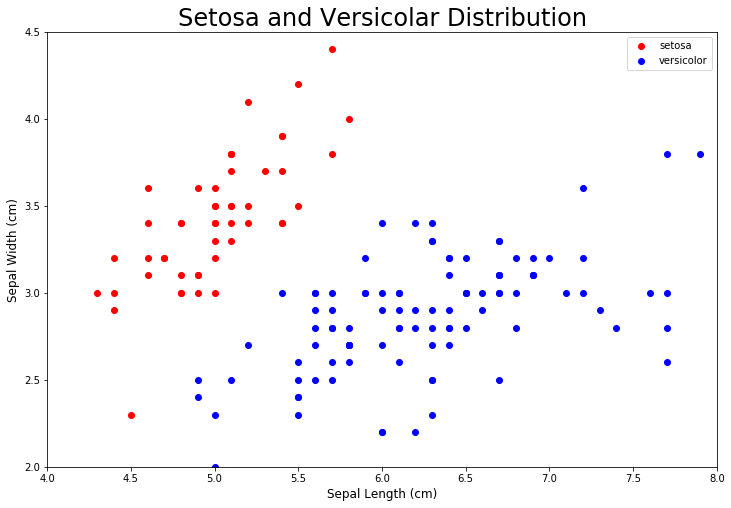

In [8]:
setosa_label = False
versicolor_label = False

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
for i in df.iterrows():
    if i[1]['Target'] == 0.0:
        if setosa_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red', label = 'setosa')
            setosa_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red')
    else:
        if versicolor_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue', label = 'versicolor')
            versicolor_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue')
plt.legend()
plt.title('Setosa and Versicolar Distribution', size = 24)
plt.xlabel('Sepal Length (cm)', size = 12)
plt.ylabel('Sepal Width (cm)', size = 12)
plt.xlim(4, 8)
plt.ylim(2, 4.5)

# Support Vector Machines

Now that we have our data organized and we understand it, it is time to start talking about SVM's. As mentioned in the introduction, support vector machines create boundaries between distinct classes of data in order to allow us easily classify new data. As humans we might create a line such as the following where we believe the data could be split.

(2, 4.5)

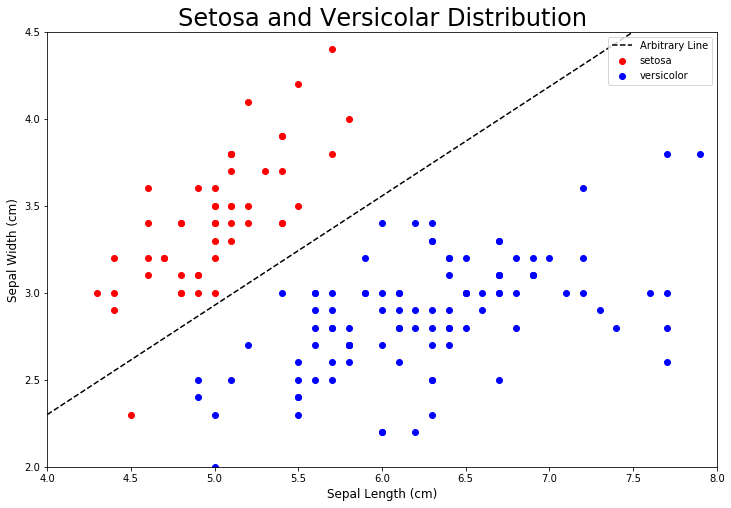

In [9]:
setosa_label = False
versicolor_label = False

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
for i in df.iterrows():
    if i[1]['Target'] == 0.0:
        if setosa_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red', label = 'setosa')
            setosa_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red')
    else:
        if versicolor_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue', label = 'versicolor')
            versicolor_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue')

ax.plot([4, 7.5], [2.3, 4.5], '--', color = 'black', label = 'Arbitrary Line')
plt.legend(loc = 1)
plt.title('Setosa and Versicolar Distribution', size = 24)
plt.xlabel('Sepal Length (cm)', size = 12)
plt.ylabel('Sepal Width (cm)', size = 12)
plt.xlim(4, 8)
plt.ylim(2, 4.5)

This is a reasonable guess but of course we would want a computer to create these boundaries to increase the accuracy. Furthermore, we are working with a simple dataset, when working with more complex datasets that transced into multiple dimensions, we will quickly reach a point where humans can not create boundaries themeslves.

## Importing The Model

We can call the svm model through the skilearn library we imported earlier. It is important to realize that we are using the **SVC** model. This stands for Support Vector Classifier. There exists a Support Vector Regression which is used in other cases. For our use, we only need to worry about SVC. I am also calling a linear kernel. With this model, there exist different kernels such as *sigmoid* and *rbf* but with a dataset as simple as ours, a linear kernel will work fine.

In [10]:
clf = svm.SVC(kernel = 'linear')

## Training The Model

We now simply import our training data and our targets into the model and we are finished!

In [11]:
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Interpreting the Data

With our model, there is an abundance of information that was calculated, such as coefficients and intercepts to name a few. These values are all used to create the boundaries for the model. The following lines of code showcase some of the data.

In [12]:
print(clf.coef_)
print(clf.intercept_)

[[-2.22720466  2.24959915]
 [-2.06931629  1.72277136]
 [-1.60096201 -0.79648515]]
[ 4.9417852   6.17860024 12.35500605]


In [13]:
xx = np.linspace(4, 8, 100)

In [14]:
print(clf.support_)

[  1  18  20  25  31  36  41  45  50  51  52  54  55  56  57  58  59  61
  62  63  65  66  67  68  70  71  72  73  74  75  76  77  78  82  83  84
  85  86  87  88  91  92  95  96  97  98  99 100 101 103 104 106 108 110
 111 112 113 114 115 116 119 121 123 124 126 127 128 132 133 134 136 137
 138 140 142 144 145 146 147 148 149]


## Plotting The Model

In the next few lines of code, I am creating the decision boundary. When working with SVM's the decision boundary is actually called a **hyperplane**. There is a bit of math that goes on behind the scenes and I highly recommend reading up on it so that you have a good idea of what's going on. 

A good resource is the following: 

[Support Vector Machines](http://www.cs.rpi.edu/~stewart/lec23-post/svms.pdf)

In [15]:
w = clf.coef_[0]
a = -w[0] / w[1]

b1 = clf.support_vectors_[0]
s1 = a * xx + (b1[1] - a * b1[0])
b2 = clf.support_vectors_[-1]
s2 = a * xx + (b2[1] - a * b2[0])

In [16]:
yy = []

for i in xx:
    yy.append(a * i - (clf.intercept_[0] / w[1]))


Now that we have created our hyperplane, we can go ahead and superimpose it to the plot we made earlier.

(2, 4.5)

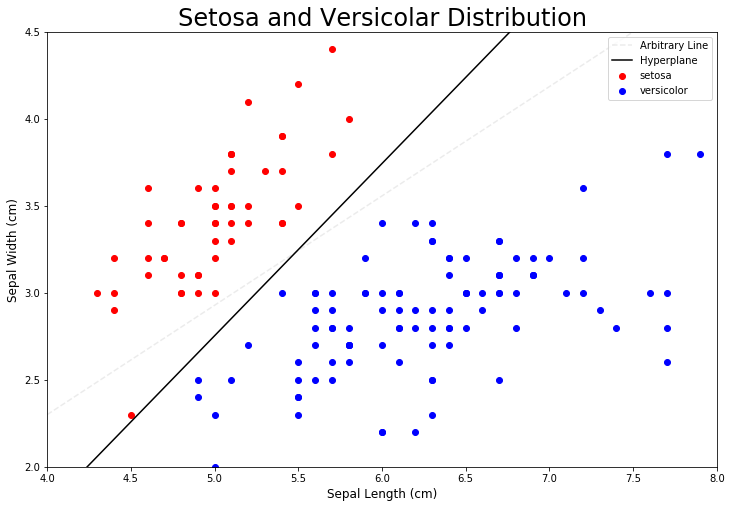

In [17]:
setosa_label = False
versicolor_label = False

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
for i in df.iterrows():
    if i[1]['Target'] == 0.0:
        if setosa_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red', label = 'setosa')
            setosa_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red')
    else:
        if versicolor_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue', label = 'versicolor')
            versicolor_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue')

ax.plot([4, 7.5], [2.3, 4.5], '--', color = 'silver', alpha = 0.3, label = 'Arbitrary Line')
ax.plot(xx, yy, color = 'black', label = 'Hyperplane')
plt.legend(loc = 1)
plt.title('Setosa and Versicolar Distribution', size = 24)
plt.xlabel('Sepal Length (cm)', size = 12)
plt.ylabel('Sepal Width (cm)', size = 12)
plt.xlim(4, 8)
plt.ylim(2, 4.5)

## Margins

The hyperplane that we have created seems to do the job nicely. It successfully separates the data from each other. Something important to bring up is the fact that a good support vector machine has a large margin. The margin is distance between the hyperplane and the closest datapoint on either side of the hyperplane. Supoprt Vector Machines try to maximize this margin.

The hyperplane we created, while it does separate all the data, the red point setosa value near the borrom left corner seems to be very close to the hyperplane. I believe that we can do better.

To do so, we can tinker with the model and edit some of the parameters. One of the parameters we can mess with is the C value. The C value tells the model how precise we want it to be. A higher C value will create a more decisive hyperplane but may be prone to overfitting. A low C value will lead to a more flexible hyperplane, but may lead to underfitting. Since we want to create a more rigid model, let's increase our C value.

In [18]:
clf2 = svm.SVC(kernel = 'linear', C = 10**4)

(2, 4.5)

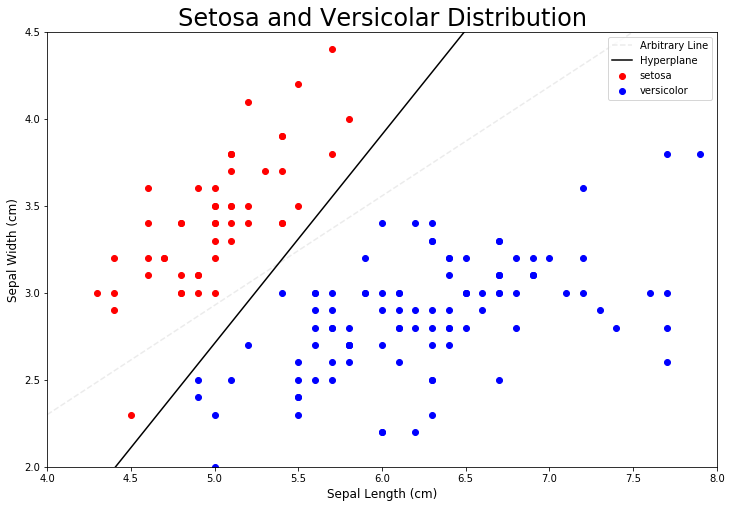

In [19]:
clf2.fit(X, y)

w = clf2.coef_[0]
a = -w[0] / w[1]

b1 = clf2.support_vectors_[0]
s1 = a * xx + (b1[1] - a * b1[0])
b2 = clf2.support_vectors_[-1]
s2 = a * xx + (b2[1] - a * b2[0])

yy = []

for i in xx:
    yy.append(a * i - (clf2.intercept_[0] / w[1]))

setosa_label = False
versicolor_label = False

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
for i in df.iterrows():
    if i[1]['Target'] == 0.0:
        if setosa_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red', label = 'setosa')
            setosa_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'red')
    else:
        if versicolor_label == False:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue', label = 'versicolor')
            versicolor_label = True
        else:
            ax.scatter(i[1]['sepal length (cm)'], i[1]['sepal width (cm)'], color = 'blue')

ax.plot([4, 7.5], [2.3, 4.5], '--', color = 'silver', alpha = 0.3, label = 'Arbitrary Line')
ax.plot(xx, yy, color = 'black', label = 'Hyperplane')
plt.legend(loc = 1)
plt.title('Setosa and Versicolar Distribution', size = 24)
plt.xlabel('Sepal Length (cm)', size = 12)
plt.ylabel('Sepal Width (cm)', size = 12)
plt.xlim(4, 8)
plt.ylim(2, 4.5)

Now we can see that the model seems to have more room to breathe. There is always room for improvement and this is where a vast majority of time will be spent.

There may be instances where it may be more beneficial to actually allow some of the data to be misclassified. By sacrificing accuracy early on, you are able to create a larger margin and a more flexible hyperplane which may end up leading to a larger accuracy as more data is introduced. This type of margin is known as a **soft margin**. While we didn't work with soft margins in this example, it is something that should be kept in the back of the mind when working with large datasets.

# Introducing the Kernal Trick

There will be times in which it will not be possible to create a simple hyperplane to separate the data. As an exercise, attempt to create a linear hyperplane with the data below. 

(-1, 1)

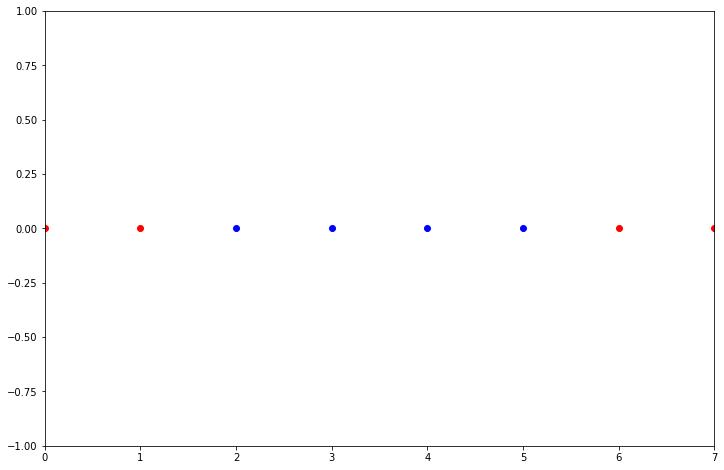

In [20]:
x1 = [0,1,6,7]
y = [0,0,0,0]
x2 = [2,3,4,5]

fig, ax = plt.subplots(1, 1, figsize = (12,8))
ax.scatter(x1, y, color = 'red')
ax.scatter(x2, y, color = 'blue')
plt.xlim(0, 7)
plt.ylim(-1,1)

The task is not easy. This is where the kernal trick is introduced. This idea is beautiful and deserves its own post so I will simply introduce it. The idea is that while we may not be able to create a hyperplane with the current data, we can add an operation through the kernal to manipulate the data and allow it to transcend into multiple dimensions. For example, the data we were working with originally was 1-Dimensional, however, if we square every value, we are able to turn the 1-Dimensional plot, into a 2-Dimensional plot.

In [21]:
y1 = np.square(x1)
y2 = np.square(x2)

print(x1, x2)
print(y1)
print(y2)

[0, 1, 6, 7] [2, 3, 4, 5]
[ 0  1 36 49]
[ 4  9 16 25]


(0, 7)

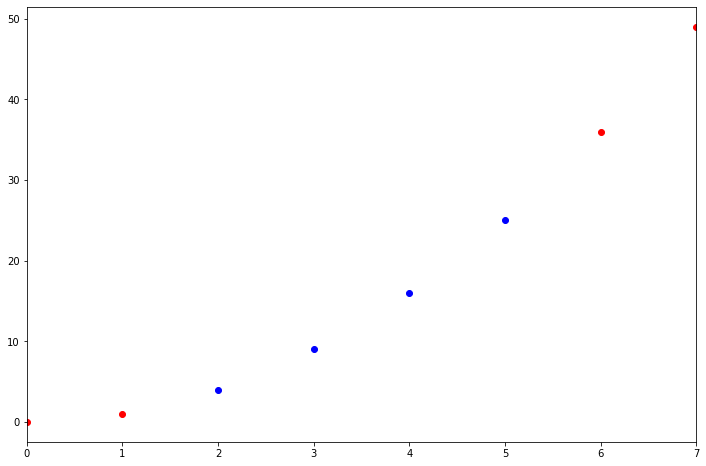

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
ax.scatter(x1, y1, color = 'red')
ax.scatter(x2, y2, color = 'blue')
plt.xlim(0, 7)

With this new plot. We can now create a hyperplane.

(0, 7)

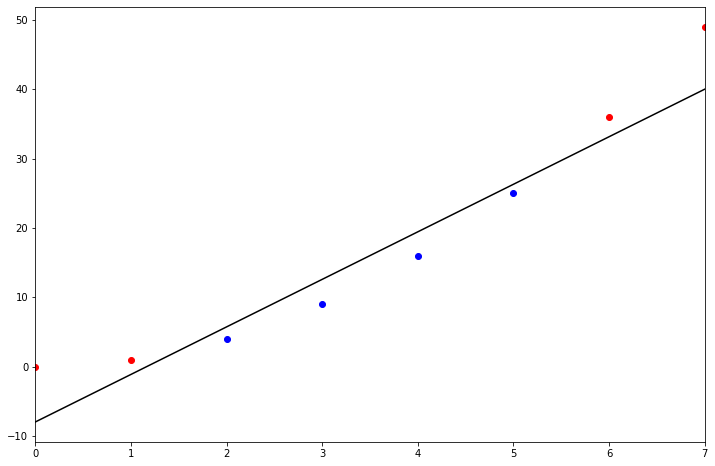

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
ax.scatter(x1, y1, color = 'red')
ax.scatter(x2, y2, color = 'blue')
ax.plot([0, 7], [-8, 40], color = 'black')
plt.xlim(0, 7)

Beautiful.

# Conclusion

Suppoert Vector Machines are beautiful supervised algorithm's which allow us to classify data. While in theory they are straight forward, there is a lot of underlying math that goes on behind the scene so make sure to brush up on your linear algebra to truly appreciate the beauty behind suppoert vector machines.